In [1]:
from utils.fileUtils.sr import NMSSM_List_studies

In [6]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-1,4)

In [51]:
tree_700_400 = Tree(NMSSM_List_studies[5], exploration=True)
tree_450_300 = Tree(NMSSM_List_studies[0], exploration=True)

In [107]:
ptBins = np.linspace(0,400,80)
etaBins = np.linspace(-4,4,80)

In [108]:
particles = ['gen_HX_b1','gen_HY1_b1','gen_HY2_b1','gen_HX_b2','gen_HY1_b2','gen_HY2_b2']
ptTitles = []
etaTitles = []
phiTitles = []
mTitles = []
for particle in particles:
    title = particle.replace('_',' ')
    title = title.replace('H','$H_')
    title = title.replace('b','\;b_')
    if 'Y' in title:
        ind = title.find('Y')
        title = title.replace('Y','{Y')
        title = title.replace(' \;b', '} \;b')
    ptTitles.append(title + '\; p_T$ [GeV]')
    etaTitles.append(title + '\; \eta$')
    phiTitles.append(title + '\; \phi$')
    mTitles.append(title + '\; m$ [GeV]')

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

for i,ax in enumerate(axs.flatten()):
    label = particles[i] + '_pt'
    n, e = Hist(tree_700_400.get(label), bins=ptBins, density=1, label='gen parton', ax=ax)
    nMax = n.max()
    label = particles[i] + '_genjet_pt'
    n, e = Hist(tree_700_400.get(label), bins=ptBins, density=1, label='gen jet', ax=ax)
    # n, e = Hist(tree_450_300.get(label), bins=ptBins, density=1, label='(450, 300)', ax=ax)
    if n.max() > nMax: nMax = n.max()
    label = particles[i] + '_recojet_pt'
    n, e = Hist(tree_700_400.get(label), bins=ptBins, density=1, label='reco jet', ax=ax)
    if n.max() > nMax: nMax = n.max()

    ax.plot([20,20],[0, nMax],'--',color='grey')
    # ax.legend(fontsize=15.5)

    ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.1f"))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

    ax.set_xlabel(ptTitles[i])
    ax.set_ylabel('Fraction of Events')

fig.suptitle(tree_700_400.sample)

fig.savefig('distributions/gen_reco_pt_700_400.pdf')

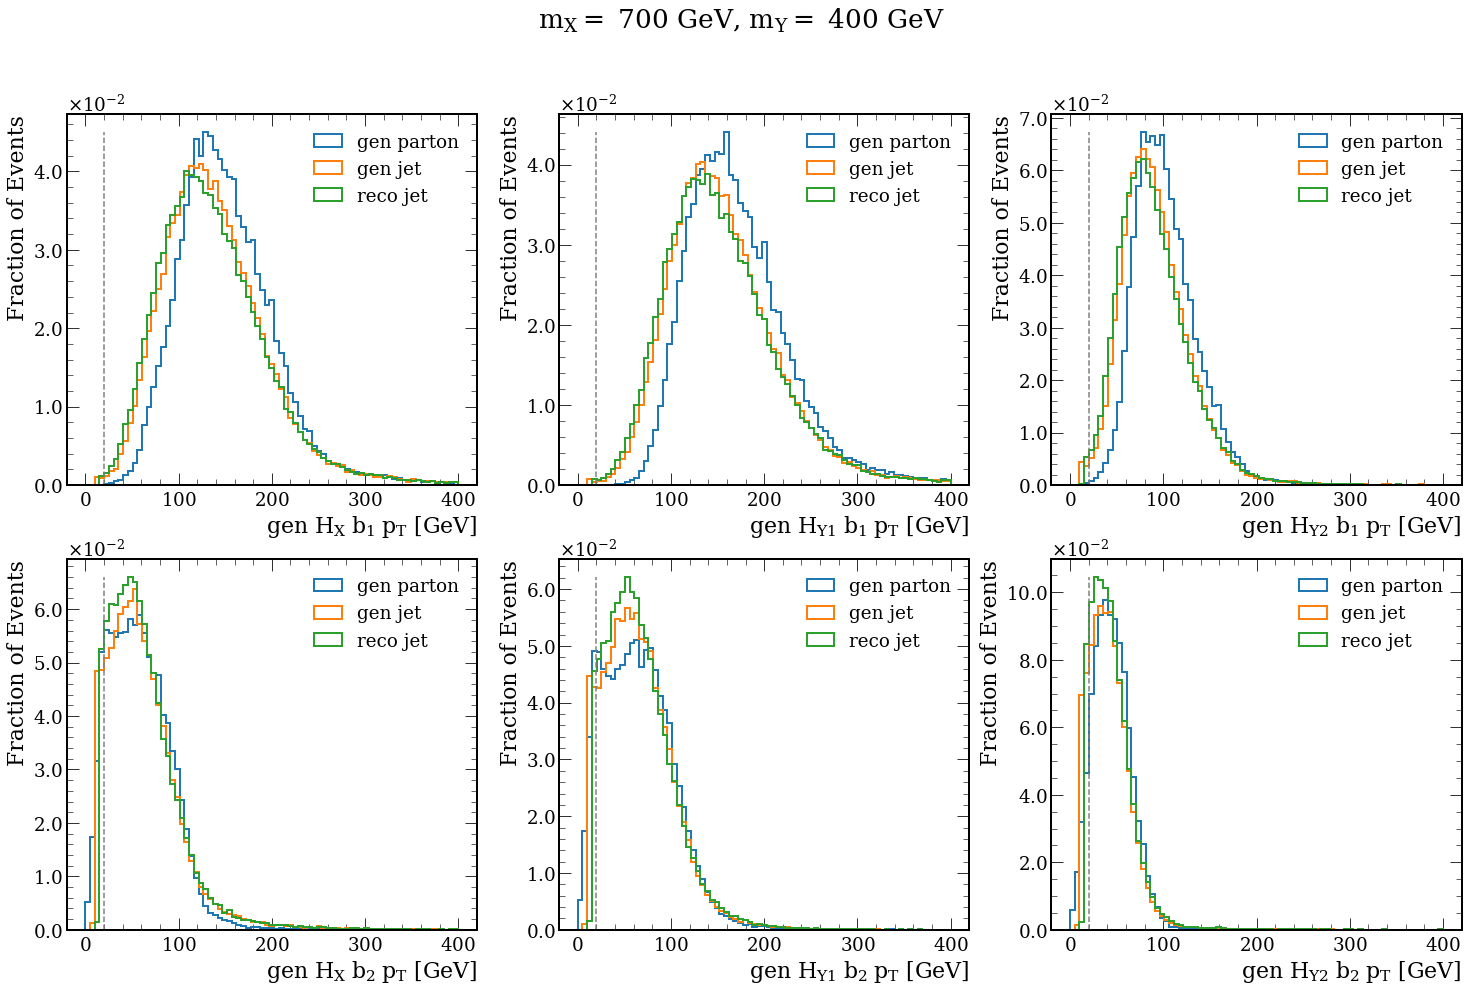

In [126]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

for i,ax in enumerate(axs.flatten()):
    label = particles[i] + '_pt'
    n, e = Hist(tree_700_400.get(label), bins=ptBins, density=1, label='(700, 400)', ax=ax)
    nMax = n.max()
    n, e = Hist(tree_450_300.get(label), bins=ptBins, density=1, label='(450, 300)', ax=ax)
    if n.max() > nMax: nMax = n.max()

    ax.plot([20,20],[0, nMax],'--',color='grey')

    ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.1f"))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

    ax.set_xlabel(ptTitles[i])
    ax.set_ylabel('Fraction of Events')

# fig.savefig('distributions/quark_pt.pdf')

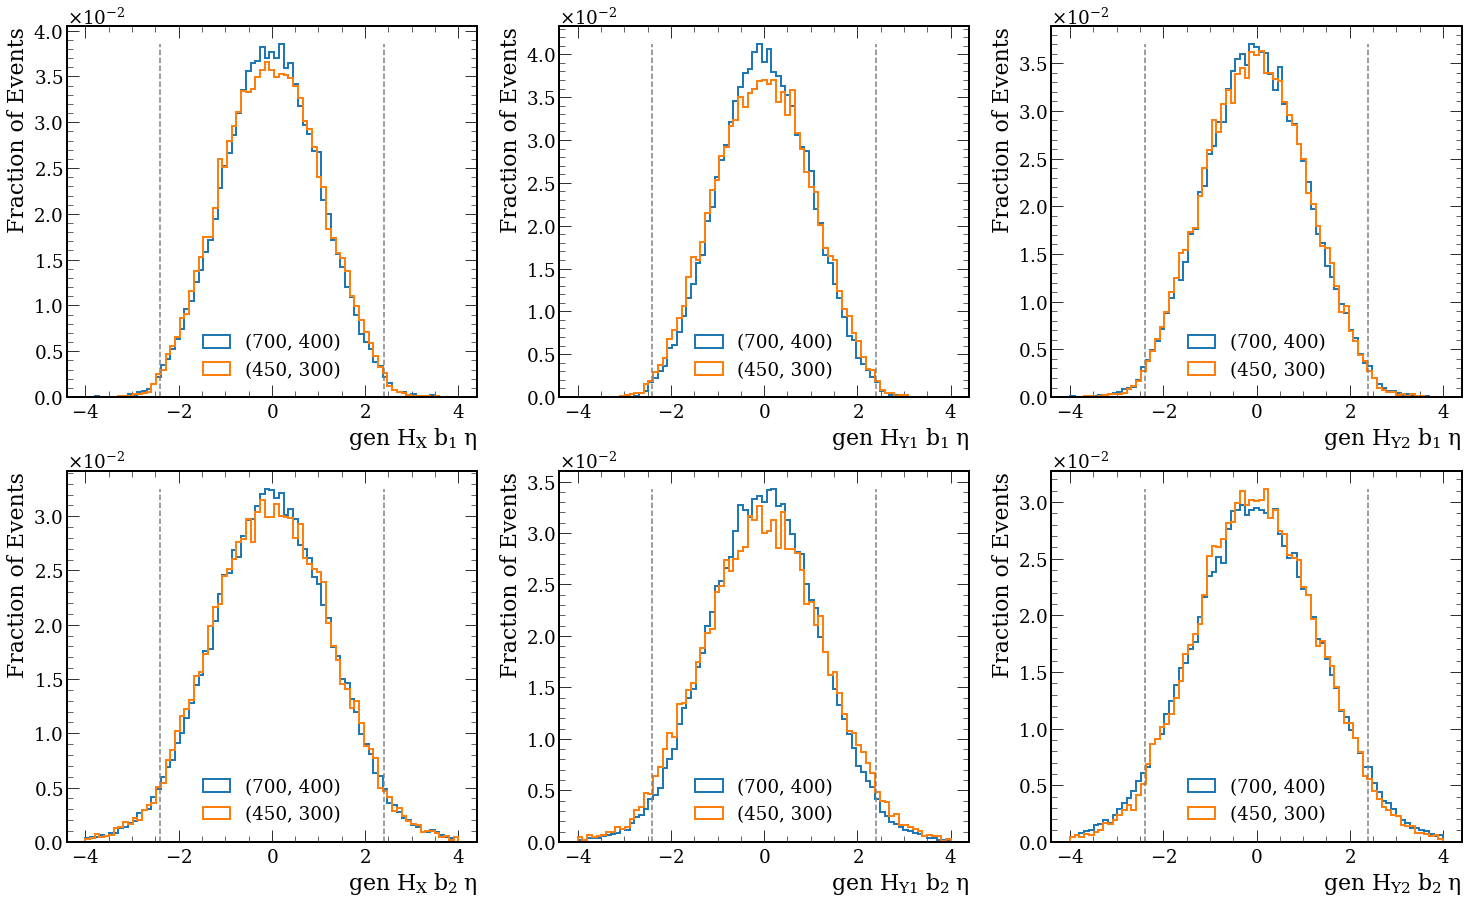

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

for i,ax in enumerate(axs.flatten()):
    label = particles[i] + '_eta'
    n, e = Hist(tree_700_400.get(label), bins=etaBins, density=1, label='(700, 400)', ax=ax)
    nMax = n.max()
    n, e = Hist(tree_450_300.get(label), bins=etaBins, density=1, label='(450, 300)', ax=ax)
    if n.max() > nMax: nMax = n.max()

    ax.plot([-2.4,-2.4],[0, nMax],'--',color='grey')
    ax.plot([+2.4,+2.4],[0, nMax],'--',color='grey')

    ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.1f"))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

    ax.set_xlabel(etaTitles[i])
    ax.set_ylabel('Fraction of Events')



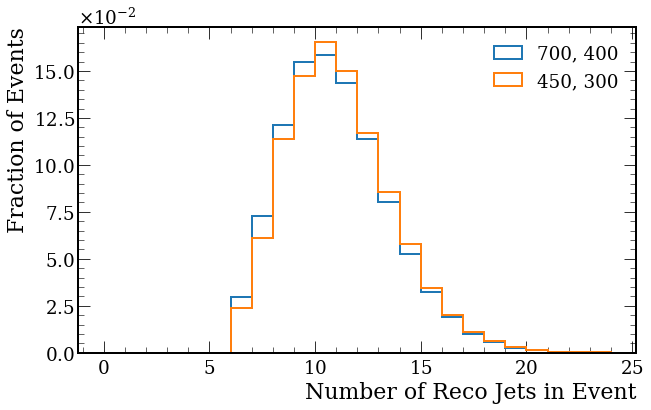

In [129]:
fig, ax = plt.subplots()

n, e = Hist(ak.count(tree_700_400.jet_pt, axis=1), bins=np.arange(25), density=1, label='700, 400', ax=ax)

ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.1f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax.set_xlabel('Number of Reco Jets in Event')
ax.set_ylabel('Fraction of Events')

n, e = Hist(ak.count(tree_450_300.jet_pt, axis=1), bins=np.arange(25), density=1, ax=ax, label='450, 300')

fig.savefig('distributions/jet_multiplicity.pdf')

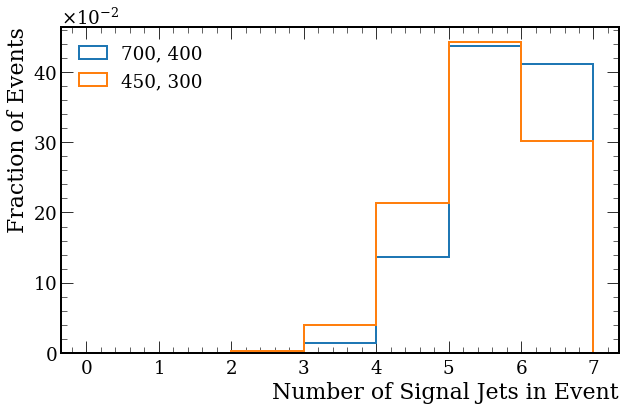

In [50]:
ax, n, e = Hist(ak.count(tree_700_400.jet_pt[tree_700_400.jet_signalId > -1], axis=1), bins=np.arange(8), density=1, label='700, 400')
n, e = Hist(ak.count(tree_450_300.jet_pt[tree_450_300.jet_signalId > -1], axis=1), bins=np.arange(8), density=1, ax=ax, label='450, 300')

ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax.set_xlabel('Number of Signal Jets in Event')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)

# ax.set_title(tree.sample, loc='right')

In [13]:
features = ak.concatenate((jet_pt, jet_eta, jet_phi, jet_m, jet_btag, jet_pt**2, jet_eta**2, jet_phi**2, jet_m**2, jet_btag**2), axis=1)

In [14]:
targets = np.zeros((len(features), 7), int)

In [15]:
targets[np.arange(len(features)), nsixb.to_numpy()] += 1

In [11]:
# signal_features = ak.concatenate((jet_pt[signal], jet_eta[signal], jet_phi[signal], jet_m[signal], jet_btag[signal], jet_pt[signal]**2, jet_eta[signal]**2, jet_phi[signal]**2, jet_m[signal]**2, jet_btag[signal]**2), axis=1)
# wrong_features = ak.concatenate((jet_pt[cbkgd], jet_eta[cbkgd], jet_phi[cbkgd], jet_m[cbkgd], jet_btag[cbkgd], jet_pt[cbkgd]**2, jet_eta[cbkgd]**2, jet_phi[cbkgd]**2, jet_m[cbkgd]**2, jet_btag[cbkgd]**2), axis=1)

In [12]:
import pandas as pd

In [13]:
cols = [f'pt {n}' for n in range(6)] + [f'eta {n}' for n in range(6)] + [f'phi {n}' for n in range(6)] + [f'm {n}' for n in range(6)] + [f'btag {n}' for n in range(6)]
cols = cols + [f'pt sq {n}' for n in range(6)] + [f'eta sq {n}' for n in range(6)] + [f'phi sq {n}' for n in range(6)] + [f'm sq {n}' for n in range(6)] + [f'btag sq {n}' for n in range(6)]

In [14]:
len(cols)

60

In [13]:
# targets = np.row_stack((np.tile([1,0], (len(signal_features), 1)), np.tile([0,1], (len(wrong_features), 1))))

In [15]:
df = pd.DataFrame(np.column_stack((features.to_numpy(), targets)), columns=cols + [f'{n} signal' for n in range(7)])

In [16]:
df['n6'] = nsixb.to_numpy()

In [17]:
for i in range(7):
#     df[f'{i} signal'] = df[f'{i} signal'].astype(int)
    df.pop(f'{i} signal')

In [18]:
df.head()

,pt 0,pt 1,pt 2,pt 3,pt 4,pt 5,eta 0,eta 1,eta 2,eta 3,...,m sq 3,m sq 4,m sq 5,btag sq 0,btag sq 1,btag sq 2,btag sq 3,btag sq 4,btag sq 5,n6
0,193.546234,134.205917,85.719055,39.674183,32.544888,123.608131,-1.706055,-1.337402,-1.283936,-0.184906,...,39.123833,27.942741,232.909897,0.970918,0.984436,0.799313,0.611115,0.010919,0.000058,3
1,98.728340,92.501930,42.790783,85.532120,51.495480,192.918686,-1.539551,-0.907959,-2.154297,-1.970947,...,94.865479,62.592400,1481.084961,0.843563,0.996098,0.910310,0.181706,0.000189,0.000179,4
2,174.225586,110.410782,94.921982,76.186264,59.059498,121.445740,-0.705566,-0.086624,-0.769775,-0.989502,...,327.642273,60.359184,381.461823,0.875248,0.870686,0.999024,0.824833,0.866136,0.238657,5
3,139.278458,108.502708,80.912331,49.428757,138.276779,38.904430,1.292480,-0.399475,1.108643,-0.546021,...,50.198315,218.953125,44.495548,0.985405,0.999024,0.999024,0.692276,0.070168,0.002357,5
4,129.189850,127.606888,117.184288,80.407341,76.879517,30.937653,-0.072662,-0.308228,-0.537109,0.058594,...,76.996330,90.566216,60.791187,0.769047,0.999024,0.996098,0.999024,0.997072,0.328047,5


In [50]:
grouped_df = df.groupby('n6')

In [19]:
import seaborn as sns

In [22]:
plt.clf()

<Figure size 432x288 with 0 Axes>

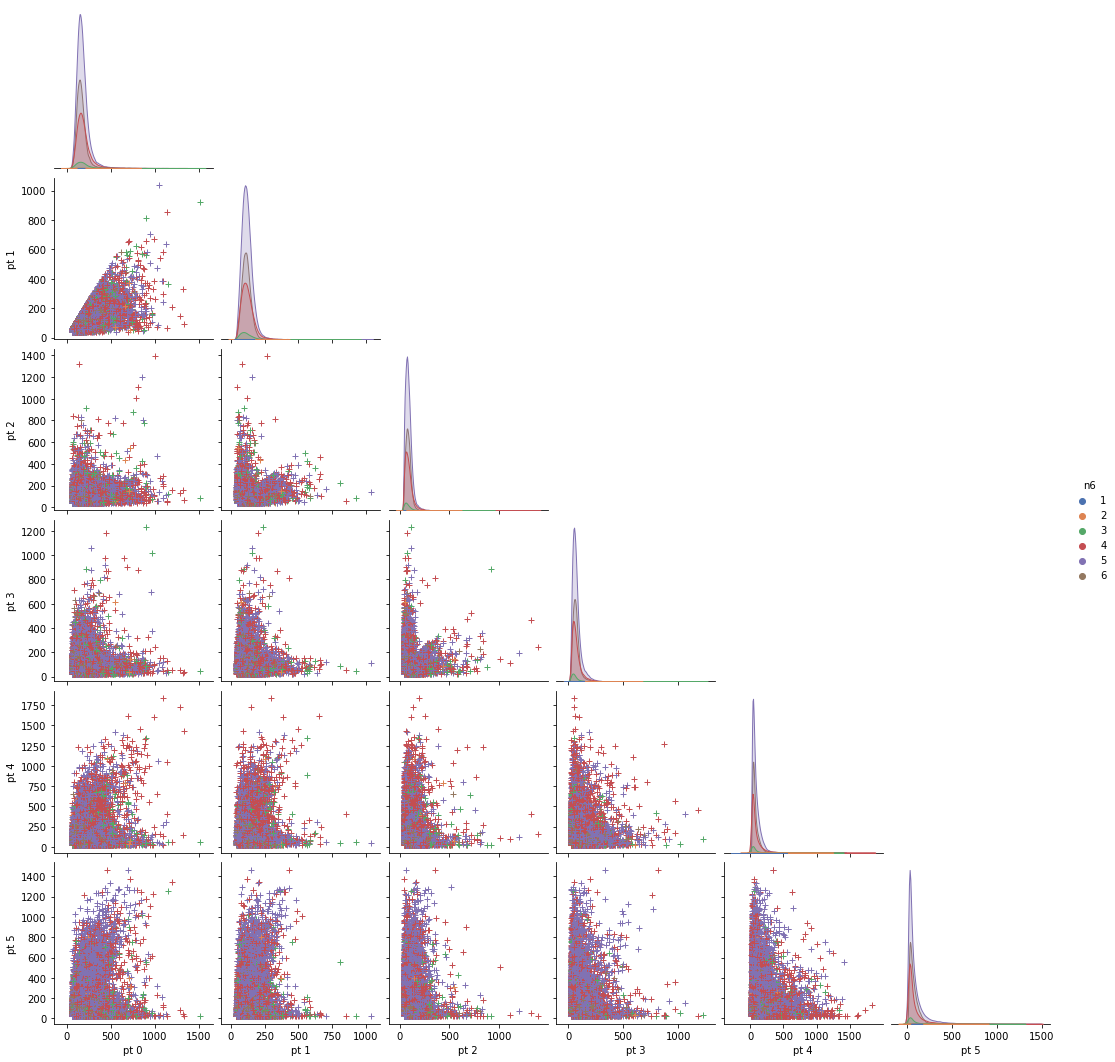

In [29]:
sns.pairplot(vars=["pt 0","pt 1","pt 2", "pt 3", "pt 4", "pt 5"], data=df, hue="n6", corner=True, palette="deep",
             plot_kws=dict(marker="+", linewidth=1),
             diag_kind='kde')
plt.show()